In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [2]:
def check_state(val, theta):
    if val >= theta: return 1
    else: return 0


def compare_result(result, truth):
    if truth == 1:
        if result == 1: return 1
        elif result == 0: return 2
    elif truth == 0:
        if result == 1: return 3
        elif result == 0: return 4




def estimation_measures(TP, FN, FP, TN):
    if TP == 0 and FP == 0:
        precision = 0
    else:
        precision = TP/(TP + FP)

    if TP == 0 and FN == 0:
        recall = 0
    else:
        recall = TP/(TP + FN)

    accuracy = (TP + TN)/(TP + FN + FP + TN)
    if precision == 0 and recall == 0:
        f1_score = 0
    else:
        f1_score = 2*precision*recall/(precision + recall)
    data = {
        "precision": precision,
        "recall": recall,
        "accuracy": accuracy,
        "f1_score": f1_score
    }
    return data



def check_estimation(y_estimate, y_truth, theta):
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    for i in range(len(y_estimate)):
        estimated = y_estimate[i]
        truth = y_truth[i]
        result = check_state(estimated, theta)
        score_state = compare_result(result, truth)
        if score_state == 1: TP += 1
        elif score_state == 2: FN += 1
        elif score_state == 3: FP += 1
        elif score_state == 4: TN += 1
    data = estimation_measures(TP, FN, FP, TN)
    return data


def get_pr_area(precision, recall):
	n = len(precision)
	area = 0
	for i in range(1, n):
		area += abs(precision[i]*(recall[i] - recall[i-1]))
	return area



def get_precision_recall(ground_val, est_val):
	precision = []
	recall = []
	theta_values = [float("{0:.2f}".format((0.0 + 0.02*i))) for i in range(50)]
	for theta in theta_values:
		data = check_estimation(est_val, ground_val, theta)
		precision.append(data["precision"])
		recall.append(data["recall"])
	area = get_pr_area(precision, recall)
	return precision, recall, area


def array_normalization(a):
	a = (a - a.min())/(a.max() - a.min())
	return a



In [3]:
df1 = pd.read_csv("predicted_prereq.csv")
df2 = pd.read_csv("refd_estimated_results.csv")

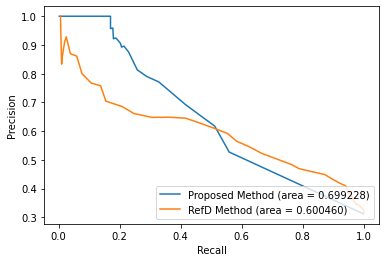

In [4]:
ground_truth = df1["relation"].to_numpy().ravel()

pr_tfidf = df1["tfidf_score"].to_numpy().ravel()
pr_tfidf = array_normalization(pr_tfidf)

refd = df2["refd_equal"].to_numpy().ravel()
refd = array_normalization(refd)

# pr_wiki_tfidf = df["wiki_tfidf_score"].to_numpy().ravel()
# pr_wiki_tfidf = array_normalization(pr_wiki_tfidf)

precision1, recall1, area1 = get_precision_recall(ground_truth, pr_tfidf)
label1 = "Proposed Method (area = {0:2f})".format((area1))
precision2, recall2, area2 = get_precision_recall(ground_truth, refd)
label2 = "RefD Method (area = {0:2f})".format((area2))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall1, precision1, label = label1)
plt.plot(recall2, precision2, label = label2)
plt.legend(loc="lower right")
plt.savefig("refd_prop.png")
